In [28]:
import momepy as mp
import os
import geopandas as gpd
import numpy as np
import pandas as pd
import openpyxl
import sklearn

In [ ]:
#a['fractal'] = mp.FractalDimension(a).series - Эта функция считает размерность "площадь-периметр"

In [29]:
#Создаем пустой геодатафрейм
d = {'land_use': [], 'name': [], 'year': [], 'urbanity': [], 'fractal': []}
gdf = gpd.GeoDataFrame(d, geometry = [], crs="EPSG:3844")

In [30]:
#Создаем базу типов ландшафтов
lu = ['Continuous urban fabric (S.L. : > 80%)', 'Discontinuous dense urban fabric (S.L. : 50% -  80%)',
       'Discontinuous low density urban fabric (S.L. : 10% - 30%)',
       'Discontinuous medium density urban fabric (S.L. : 30% - 50%)',
       'Discontinuous very low density urban fabric (S.L. : < 10%)', 'Isolated Structures', 
      'Industrial, commercial, public, military and private units', 'Fast transit roads and associated land',
      'Other roads and associated land', 'Railways and associated land', 'Port areas', 'Airports', 
      'Mineral extraction and dump sites', 'Construction sites', 'Land without current use', 'Green urban areas', 
      'Sports and leisure facilities', 'Arable land (annual crops)', 'Permanent crops (vineyards, fruit trees, olive groves)',
      'Pastures', 'Complex and mixed cultivation patterns', 'Orchards at the fringe of urban classes', 'Forests',
      'Herbaceous vegetation associations (natural grassland, moors...)', 
      'Open spaces with little or no vegetations (beaches, dunes, bare rocks, glaciers)', 'Wetland', 'Water bodies']

<AxesSubplot:>

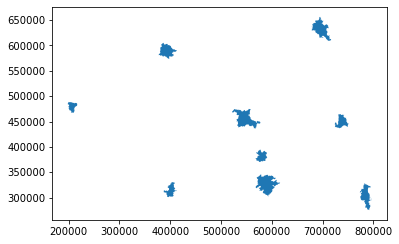

In [31]:
#Скачиваем границы агломераций
os.chdir(r'C:\Users\Артем Смирнов\Desktop\Uni\Coursework\SmirnovData\GPKG_Files\Agglomerations')
agg = gpd.GeoDataFrame(geometry = [], crs="EPSG:3844")
ld = os.listdir()
for i in ld:
    rdfl = gpd.read_file(i)
    agg = pd.concat([agg, rdfl], ignore_index=True)
agg.plot()

<AxesSubplot:>

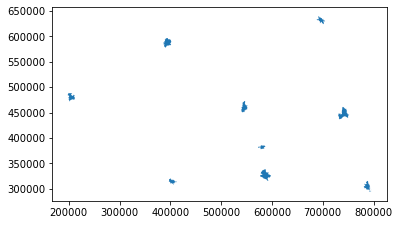

In [32]:
#Скачиваем границы городов
os.chdir(r'C:\Users\Артем Смирнов\Desktop\Uni\Coursework\SmirnovData\GPKG_Files\Cities')
cit = gpd.GeoDataFrame(geometry = [], crs="EPSG:3844")
ld = os.listdir()
for i in ld:
    rdfl = gpd.read_file(i)
    cit = pd.concat([cit, rdfl], ignore_index=True)
cit.plot()

<AxesSubplot:>

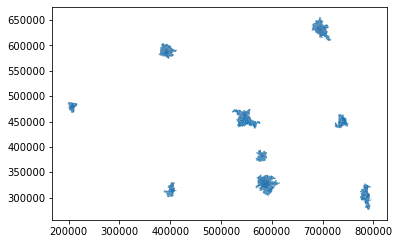

In [38]:
#Землепользование 2012
os.chdir(r'C:\Users\Артем Смирнов\Desktop\Uni\Coursework\SmirnovData\GPKG_Files\GPKG_2012')
g12 = gpd.GeoDataFrame(geometry = [], crs="EPSG:3844")
ld = os.listdir()
for i in ld:
    rdfl = gpd.read_file(i)
    g12 = pd.concat([g12, rdfl], ignore_index=True)
g12.plot()

<AxesSubplot:>

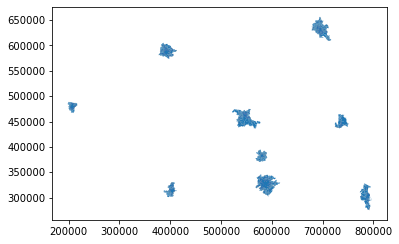

In [34]:
#Землепользование 2018
os.chdir(r'C:\Users\Артем Смирнов\Desktop\Uni\Coursework\SmirnovData\GPKG_Files\GPKG_2018')
g18 = gpd.GeoDataFrame(geometry = [], crs="EPSG:3844")
ld = os.listdir()
for i in ld:
    rdfl = gpd.read_file(i)
    g18 = pd.concat([g18, rdfl], ignore_index=True)
g18.plot()

In [39]:
#Объединяем полигоны по типу землепользования 2012
g12 = g12.dissolve(by = ['class_2012', 'fua_name'])
g12['fractal'] = mp.FractalDimension(g12).series
g12 = g12.reset_index()
g12 = g12.rename(columns={'class_2012': 'land_use', 'country': 'year', 'fua_name':'name' })
g12 = g12[['land_use', 'name', 'year', 'fractal', 'geometry']]
g12['year'] = '2012'
g12

In [47]:
#Объединяем полигоны по типу землепользования 2018
g18 = g18.dissolve(by = ['class_2018', 'fua_name'])
g18['fractal'] = mp.FractalDimension(g18).series
g18 = g18.reset_index()
g18 = g18.rename(columns={'class_2018': 'land_use', 'country': 'year', 'fua_name':'name' })
g18 = g18[['land_use', 'name', 'year', 'fractal', 'geometry']]
g18['year'] = '2018'
g18

,land_use,name,year,fractal,geometry
0,Airports,Brasov,2018,1.182517,"MULTIPOLYGON (((541122.128 466446.167, 541190...."
1,Airports,Bucureşti,2018,1.133263,"MULTIPOLYGON (((587216.714 333435.376, 587216...."
2,Airports,Cluj-Napoca,2018,1.162178,"MULTIPOLYGON (((399015.378 587651.632, 398929...."
3,Airports,Constanta,2018,1.078630,"POLYGON ((790507.979 282818.478, 790508.129 28..."
4,Airports,Craiova,2018,1.042197,"POLYGON ((410209.195 313823.235, 410226.268 31..."
...,...,...,...,...,...
204,Wetlands,Craiova,2018,1.131348,"MULTIPOLYGON (((402110.890 315401.943, 402149...."
205,Wetlands,Galati,2018,1.127200,"MULTIPOLYGON (((748494.822 441153.681, 748541...."
206,Wetlands,Iasi,2018,1.153887,"MULTIPOLYGON (((694062.334 623282.681, 693888...."
207,Wetlands,Ploiesti,2018,1.250373,"MULTIPOLYGON (((578141.643 370966.974, 578139...."


In [48]:
#Собираем все объединенные типы землепользования
g = pd.concat([g12, g18], ignore_index=True)
g

,land_use,name,year,fractal,geometry
0,Airports,Brasov,2012,1.082186,"MULTIPOLYGON (((541789.796 466306.755, 541810...."
1,Airports,Bucureşti,2012,1.133263,"MULTIPOLYGON (((587216.714 333435.376, 587216...."
2,Airports,Cluj-Napoca,2012,1.119103,"MULTIPOLYGON (((399015.378 587651.632, 398929...."
3,Airports,Constanta,2012,1.078039,"POLYGON ((790507.979 282818.478, 790508.129 28..."
4,Airports,Craiova,2012,1.042197,"POLYGON ((410209.195 313823.235, 410226.268 31..."
...,...,...,...,...,...
414,Wetlands,Craiova,2018,1.131348,"MULTIPOLYGON (((402110.890 315401.943, 402149...."
415,Wetlands,Galati,2018,1.127200,"MULTIPOLYGON (((748494.822 441153.681, 748541...."
416,Wetlands,Iasi,2018,1.153887,"MULTIPOLYGON (((694062.334 623282.681, 693888...."
417,Wetlands,Ploiesti,2018,1.250373,"MULTIPOLYGON (((578141.643 370966.974, 578139...."


In [312]:
#Выделяем застройку
bubu = lu[0:12] + [lu[16]] + [lu[13]]
b = g.loc[g['land_use'].isin(bubu)]
k = ['name', 'year']
b = b.dissolve(by = k)
b['fractal'] = mp.FractalDimension(b).series
b = b.reset_index()
b['land_use'] = 'built-up'
b

,name,year,geometry,land_use,fractal
0,Brasov,2012,"MULTIPOLYGON (((532542.103 443654.941, 532542....",built-up,1.429159
1,Brasov,2018,"MULTIPOLYGON (((532542.103 443654.941, 532542....",built-up,1.428197
2,Bucureşti,2012,"MULTIPOLYGON (((569412.903 318932.093, 569408....",built-up,1.398164
3,Bucureşti,2018,"MULTIPOLYGON (((569412.903 318932.093, 569408....",built-up,1.400795
4,Cluj-Napoca,2012,"MULTIPOLYGON (((379470.449 581422.846, 379437....",built-up,1.448918
5,Cluj-Napoca,2018,"MULTIPOLYGON (((379437.531 581462.630, 379437....",built-up,1.444244
6,Constanta,2012,"MULTIPOLYGON (((776583.242 295566.589, 776595....",built-up,1.397491
7,Constanta,2018,"MULTIPOLYGON (((776583.242 295566.589, 776595....",built-up,1.398285
8,Craiova,2012,"MULTIPOLYGON (((395031.706 302155.047, 395115....",built-up,1.397387
9,Craiova,2018,"MULTIPOLYGON (((395031.706 302155.047, 395115....",built-up,1.398374


In [349]:
#Вытаскиваем ратуши
os.chdir(r'C:\Users\Артем Смирнов\Desktop\Uni\Coursework\SmirnovData\GPKG_Files\Centroids')
cnt = gpd.read_file('Townhalls.gpkg')

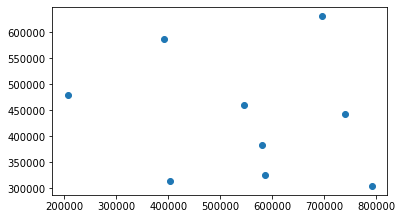

In [350]:
#Пустой массив
ars = gpd.GeoDataFrame(geometry = [], crs="EPSG:3844")

In [351]:
#Area-Radius Scaling
for r in range (1000, 40500, 500):
    cb = cnt.buffer(r)
    cg = gpd.GeoDataFrame(geometry=gpd.GeoSeries(cb))
    sercular = gpd.overlay(cg, b, how='intersection')
    sercular['fractal'] = mp.FractalDimension(sercular).series
    sercular['area'] = sercular.area
    sercular['radius'] = r
    ars = pd.concat([ars, sercular], ignore_index=True)

In [353]:
#Переводим ГДФ в ДФ для простоты обработки
df = pd.DataFrame(ars)

In [355]:
#Отбрасываем те радиусы, на которых город перестает расти
ddf = df.drop_duplicates(subset=['year', 'fractal'])

In [357]:
ddf = ddf.sort_values(['name', 'year'])

In [359]:
#Вычисляем логарифмы для дальнейших расчетов размерности
ddf['lnarea'] = np.log(ddf['area'])
ddf['lnaradius'] = np.log(ddf['radius'])

In [361]:
#Устраняем лаги Бухареста (генерировались лишние мультиполигоны)
ddf[(ddf.year == '2012') & (df.name == 'Bucureşti')]

C:\Users\Артем Смирнов\AppData\Local\Temp\ipykernel_21100\2391005671.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ddf[(ddf.year == '2012') & (df.name == 'Bucureşti')]


,geometry,name,year,land_use,fractal,slope,r2,area,radius,lnarea,lnaradius
2,"POLYGON ((588145.719 326552.234, 588135.729 32...",Bucureşti,2012,built-up,1.137031,1.241613,0.951243,2.494257e+06,1000.0,14.729502,6.907755
20,"POLYGON ((588643.311 326503.226, 588621.712 32...",Bucureşti,2012,built-up,1.165008,1.241613,0.951243,5.845216e+06,1500.0,15.581134,7.313220
38,"POLYGON ((589140.903 326454.217, 589112.104 32...",Bucureşti,2012,built-up,1.164260,1.241613,0.951243,1.095020e+07,2000.0,16.208868,7.600902
56,"MULTIPOLYGON (((589638.496 326405.208, 589602....",Bucureşti,2012,built-up,1.174385,1.241613,0.951243,1.728777e+07,2500.0,16.665510,7.824046
74,"MULTIPOLYGON (((590136.088 326356.200, 590092....",Bucureşti,2012,built-up,1.183640,1.241613,0.951243,2.484682e+07,3000.0,17.028240,8.006368
...,...,...,...,...,...,...,...,...,...,...,...
1028,"MULTIPOLYGON (((569433.910 319976.795, 569410....",Bucureşti,2012,built-up,1.398164,1.241613,0.951243,3.119683e+08,29500.0,19.558412,10.292146
1335,"POLYGON ((579307.556 345079.168, 579295.761 34...",Bucureşti,2012,built-up,1.253826,1.241613,0.951243,3.051552e+03,38000.0,8.023406,10.545341
1355,"POLYGON ((579295.761 345087.309, 579294.600 34...",Bucureşti,2012,built-up,1.258762,1.241613,0.951243,4.495772e+03,38500.0,8.410893,10.558414
1395,"MULTIPOLYGON (((590117.737 344766.215, 590117....",Bucureşti,2012,built-up,1.314049,1.241613,0.951243,5.519740e+03,39500.0,8.616086,10.584056


In [362]:
ddf = ddf.drop(ddf[(ddf.name == 'Bucureşti') & (ddf.radius > 30000)].index)

In [365]:
import pwlf
import matplotlib.pyplot as plt

In [679]:
#Русские названия городов
ddf['imya'].loc[ddf['name'] == 'Brasov'] = "Брашов"
ddf['imya'].loc[ddf['name'] == 'Bucureşti'] = "Бухарест"
ddf['imya'].loc[ddf['name'] == 'Cluj-Napoca'] = "Клуж-Напока"
ddf['imya'].loc[ddf['name'] == 'Constanta'] = "Констанца"
ddf['imya'].loc[ddf['name'] == 'Craiova'] = "Крайова"
ddf['imya'].loc[ddf['name'] == 'Galati'] = "Галац"
ddf['imya'].loc[ddf['name'] == 'Iasi'] = "Яссы"
ddf['imya'].loc[ddf['name'] == 'Ploiesti'] = "Плоешти"
ddf['imya'].loc[ddf['name'] == 'Timişoara'] = "Тимишоара"

C:\Users\Артем Смирнов\AppData\Local\Temp\ipykernel_21100\2600539490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['imya'].loc[ddf['name'] == 'Brasov'] = "Брашов"
C:\Users\Артем Смирнов\AppData\Local\Temp\ipykernel_21100\2600539490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['imya'].loc[ddf['name'] == 'Bucureşti'] = "Бухарест"
C:\Users\Артем Смирнов\AppData\Local\Temp\ipykernel_21100\2600539490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [685]:
b['imya'] = 'y'

In [686]:
b['imya'].loc[b['name'] == 'Brasov'] = "Брашов"
b['imya'].loc[b['name'] == 'Bucureşti'] = "Бухарест"
b['imya'].loc[b['name'] == 'Cluj-Napoca'] = "Клуж-Напока"
b['imya'].loc[b['name'] == 'Constanta'] = "Констанца"
b['imya'].loc[b['name'] == 'Craiova'] = "Крайова"
b['imya'].loc[b['name'] == 'Galati'] = "Галац"
b['imya'].loc[b['name'] == 'Iasi'] = "Яссы"
b['imya'].loc[b['name'] == 'Ploiesti'] = "Плоешти"
b['imya'].loc[b['name'] == 'Timişoara'] = "Тимишоара"

C:\Users\Артем Смирнов\AppData\Local\Temp\ipykernel_21100\112836048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['imya'].loc[b['name'] == 'Brasov'] = "Брашов"
C:\Users\Артем Смирнов\AppData\Local\Temp\ipykernel_21100\112836048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['imya'].loc[b['name'] == 'Bucureşti'] = "Бухарест"
C:\Users\Артем Смирнов\AppData\Local\Temp\ipykernel_21100\112836048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [687]:
#Списки уникальных сочетаний названий и лет
j = ddf['year'].unique()
n = ddf['imya'].unique()

In [507]:
import scipy
from scipy import stats

In [508]:
#Создаем колонки
b['slope'] = 0
b['r2'] = 0
b['r_sq'] = 0
b['border'] = 0
b['slope1'] = 0
b['slope2'] = 0

2012 Брашов 0.8399001932742991 0.9371201310734317
2018 Брашов 0.8582130809398156 0.9361950665854617


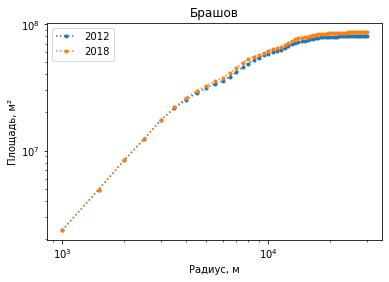

2012 Бухарест 1.2607179267553437 0.9513267606895172
2018 Бухарест 1.2911871593877662 0.9539245051992984


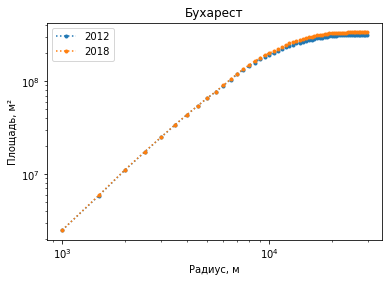

2012 Клуж-Напока 0.8659110536334721 0.933156757433788
2018 Клуж-Напока 0.9107384320525589 0.9376564061993586


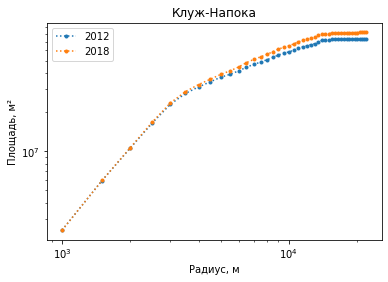

2012 Констанца 0.9723281076960039 0.963667184287751
2018 Констанца 0.9936813186171894 0.9665376678065509


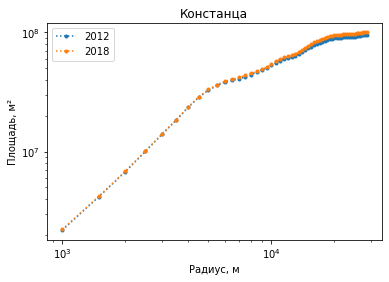

2012 Крайова 0.8703848333927922 0.9290113554125397
2018 Крайова 0.8772093744784155 0.9287762293541164


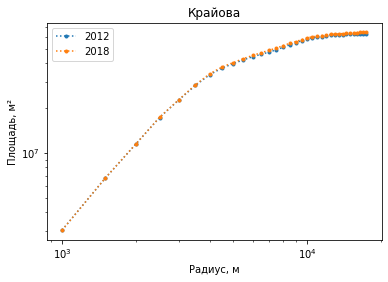

2012 Галац 0.7947821185414041 0.9473904018748732
2018 Галац 0.8082905131546011 0.9491495410545531


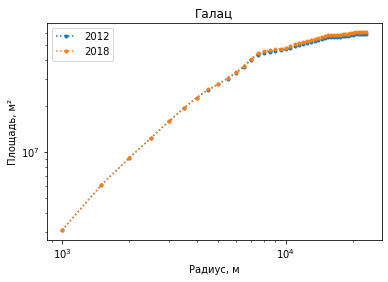

2012 Яссы 0.8301568393323715 0.941940936811536
2018 Яссы 0.8521372316897383 0.9389075254885803


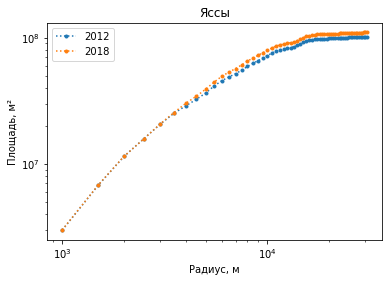

2012 Плоешти 1.1177755407905074 0.9736748457692839
2018 Плоешти 1.125127805737097 0.9740972715545645


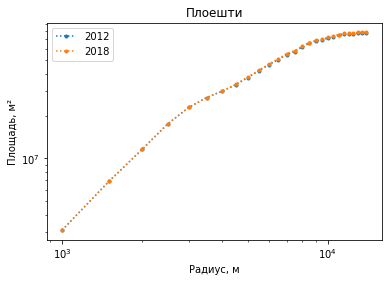

2012 Тимишоара 1.2083722032196644 0.9434728364079896
2018 Тимишоара 1.242388252454575 0.9490158634793516


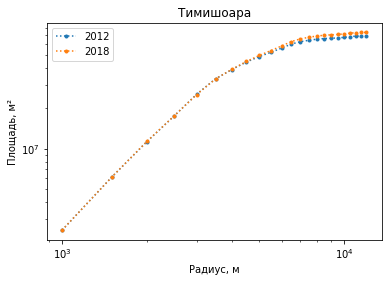

In [693]:
#Строим линейные регрессии Area-Radius
for m in range(len(n)):
    nm = n[m]
    for i in range(len(j)):
        yr = j[i]
        xy = ddf.loc[(ddf['year'] == yr) & (ddf['imya'] == nm)]
        x=np.array(xy['lnaradius'])
        y=np.array(xy['lnarea'])
        slope, intercept, r_sq, p_val, stder = stats.linregress(x, y)
        print(yr, nm, slope, r_sq)
        b.loc[((b['year'] == yr) & (b['imya'] == nm)),'slope'] = slope
        b.loc[((b['year'] == yr) & (b['imya'] == nm)),'r2'] = r_sq
        plt.plot(np.array(xy['radius']), np.array(xy['area']), ':.')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Радиус, м')
        plt.ylabel('Площадь, м²')
        plt.legend(labels = j)
    plt.title(nm)
    plt.show()

0.9872959925547319 7738.042854549875 1.4301661888764161 0.3348864796233489


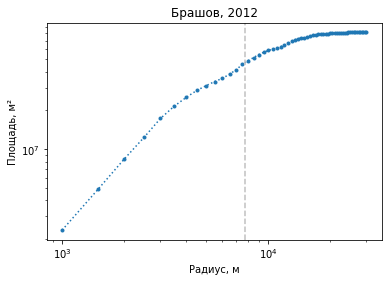

0.9891764357312626 7717.069701143738 1.4733552582989013 0.3344726755614716


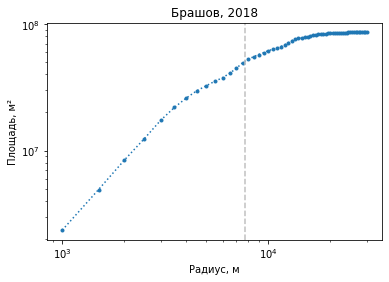

0.9967906139112683 9735.14872275124 1.9029421562840283 0.3939541148681351


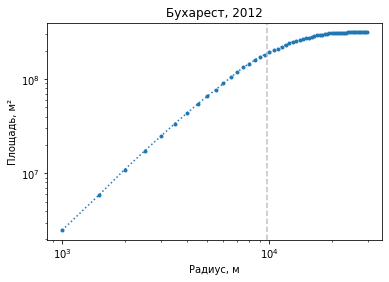

0.9970040523052047 10224.813096343129 1.9015613738491832 0.38212412381698474


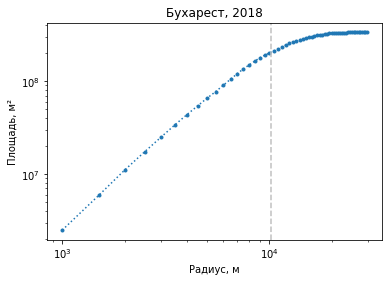

0.9930723940218172 3684.571786622998 1.9603113322089465 0.501670207529428


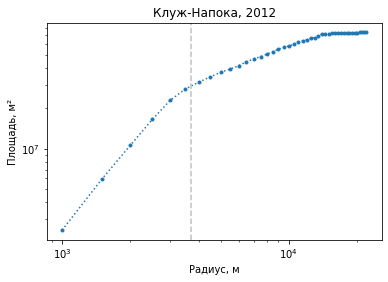

0.9919059890844748 3760.492736822562 1.9864103511335476 0.5386377959946821


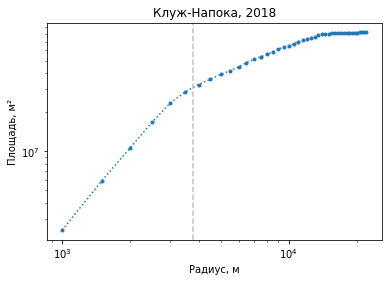

0.9963042672332989 5128.281041508634 1.7126432675006718 0.6423699275322566


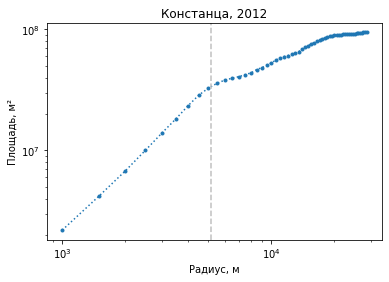

0.9958369266982651 5139.730979052463 1.7122411947631908 0.6721638444686057


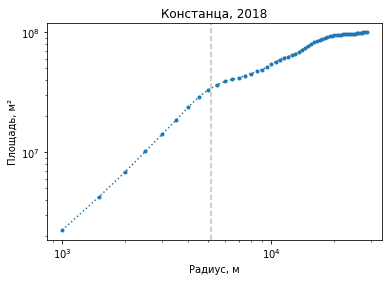

0.9956584996697067 4155.187939140744 1.7411771206374547 0.386952224821355


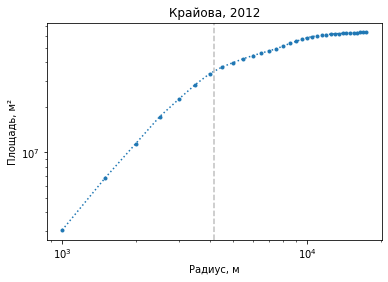

0.9959765658239987 4187.258318708929 1.7505583180298279 0.38485044806873364


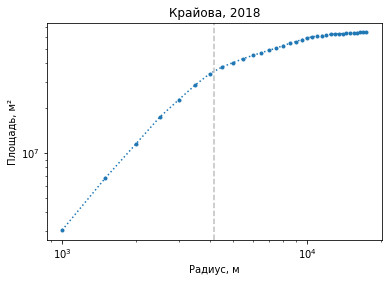

0.9956914777146724 6890.414023045443 1.281194920619935 0.30272553797045143


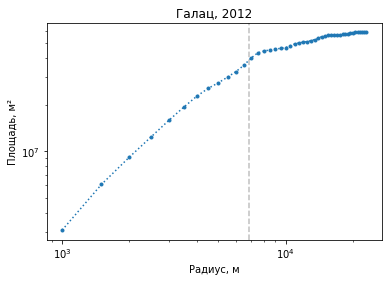

0.9960409089893353 7162.1972452250075 1.2768647539674807 0.29672555424081465


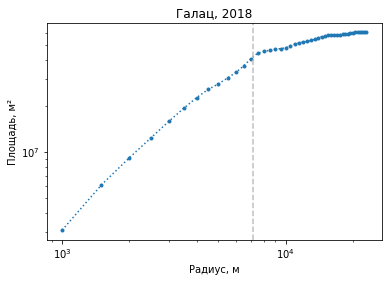

0.9893183422573726 8691.69061969563 1.34143321684039 0.3024416623729069


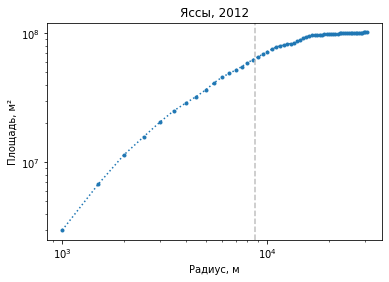

0.991715718948962 8679.047741560333 1.3998519521061785 0.2883344057495598


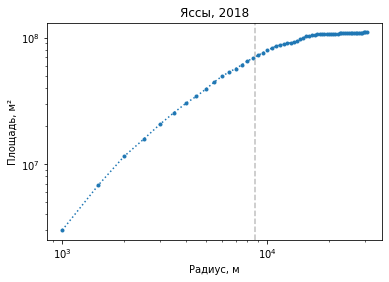

0.9936882982555885 3216.17983037477 1.8380101624647327 0.800734763076652


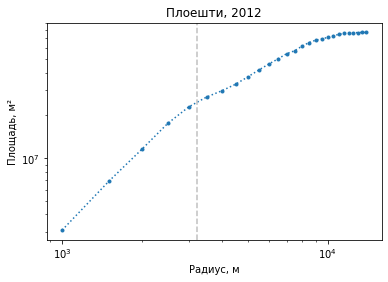

0.9936385645794076 3227.3928350668234 1.83985997865244 0.808153816149937


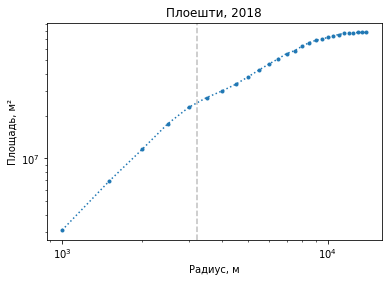

0.9965103041743688 4176.257256932196 2.015969468346215 0.4221648489501636


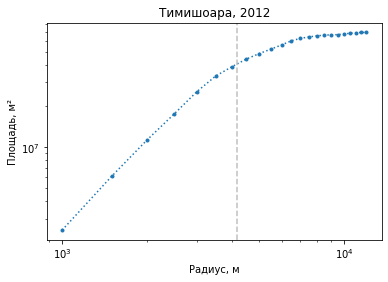

0.99621407655368 4221.285506706345 2.0155782490848253 0.4706426142767669


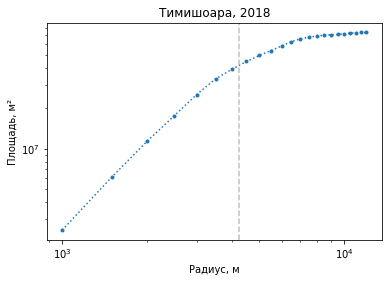

In [741]:
#Находим границу города и агломерации
for m in range(len(n)):
    nm = n[m]
    for i in range(len(j)):
        yr = j[i]
        xy = ddf.loc[(ddf['year'] == yr) & (ddf['imya'] == nm)]
        x=np.array(xy['lnaradius'])
        y=np.array(xy['lnarea'])
        my_pwlf = pwlf.PiecewiseLinFit(x, y)
        res = my_pwlf.fit(2)
        r_sq = my_pwlf.r_squared()
        slp = my_pwlf.calc_slopes()
        print(r_sq, np.exp(res[1]), slp[0], slp[1])
        b.loc[((b['year'] == yr) & (b['imya'] == nm)),'r_sq'] = r_sq
        b.loc[((b['year'] == yr) & (b['imya'] == nm)),'border'] = np.exp(res[1])
        b.loc[((b['year'] == yr) & (b['imya'] == nm)),'slope1'] = slp[0]
        b.loc[((b['year'] == yr) & (b['imya'] == nm)),'slope2'] = slp[1]
        plt.plot(np.array(xy['radius']), np.array(xy['area']), ':.')
        plt.axvline(np.exp(res[1]), ls ='--', c = '#c0c0c0')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Радиус, м')
        plt.ylabel('Площадь, м²')
        plt.title(nm + ', ' + yr)
        plt.show()

In [711]:
import statistics

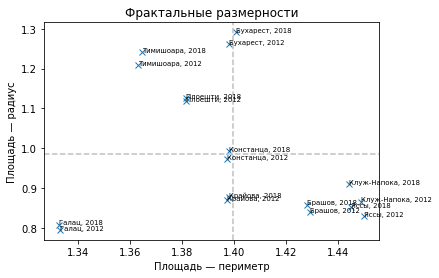

In [728]:
#График для агломераций
plt.plot(b['fractal'], b['slope'], 'x')
for i in range(len(b)):
    plt.text(b.at[i, 'fractal'], b.at[i, 'slope'], s = (b.at[i, 'imya'] + ', ' + b.at[i, 'year']), size = 'x-small')
plt.xlabel('Площадь — периметр')
plt.ylabel('Площадь — радиус')
plt.title('Фрактальные размерности')
plt.axvline(statistics.mean(b['fractal']), ls ='--', c = '#c0c0c0')
plt.axhline(statistics.mean(b['slope']), ls ='--', c = '#c0c0c0')
plt.show()


In [ ]:
#Строим центроиды за 2012 год

In [1]:
cnt = gpd.read_file('TH.gpkg')

NameError: name 'gpd' is not defined

In [714]:
cnt12 = cnt[cnt.year == 2012]
cnt18 = cnt[cnt.year == 2018]
cnt18 = cnt18.reset_index(drop=True)

In [715]:
clown = gpd.GeoDataFrame(geometry = [], crs="EPSG:3844")
circ12 = gpd.GeoDataFrame(geometry = [], crs="EPSG:3844")
circ18 = gpd.GeoDataFrame(geometry = [], crs="EPSG:3844")

In [716]:
for i in range (len(cnt12)):
    a = cnt12.loc[i, 'radius']
    print(a)
    clown = cnt12.loc[[i]]
    clown = clown.buffer(a)
    clown = gpd.GeoDataFrame(geometry=gpd.GeoSeries(clown))
    circ12 = pd.concat([circ12, clown], ignore_index=True)
for i in range (len(cnt18)):
    a = cnt18.loc[i, 'radius']
    print(a)
    clown = cnt18.loc[[i]]
    clown = clown.buffer(a)
    clown = gpd.GeoDataFrame(geometry=gpd.GeoSeries(clown))
    circ18 = pd.concat([circ18, clown], ignore_index=True)

6890
9735
7738
3685
5128
4155
8692
3216
4176
7162
10225
7717
3760
5140
4187
8679
3227
4221


<AxesSubplot:>

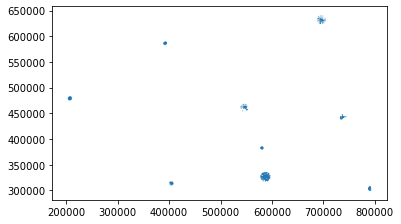

In [750]:
#Полигоны центров городов строим путем наложения
bc = gpd.overlay(circ12, b, how='intersection')
bc
bc.plot()

In [754]:
bc['fractal'] = mp.FractalDimension(bc).series

In [586]:
bc = gpd.overlay(circ, bc, how='intersection')

In [775]:
bc['imya'].loc[bc['name'] == 'Brasov'] = "Брашов"
bc['imya'].loc[bc['name'] == 'Bucureşti'] = "Бухарест"
bc['imya'].loc[bc['name'] == 'Cluj-Napoca'] = "Клуж-Напока"
bc['imya'].loc[bc['name'] == 'Constanta'] = "Констанца"
bc['imya'].loc[bc['name'] == 'Craiova'] = "Крайова"
bc['imya'].loc[bc['name'] == 'Galati'] = "Галац"
bc['imya'].loc[bc['name'] == 'Iasi'] = "Яссы"
bc['imya'].loc[bc['name'] == 'Ploiesti'] = "Плоешти"
bc['imya'].loc[bc['name'] == 'Timişoara'] = "Тимишоара"

C:\Users\Артем Смирнов\AppData\Local\Temp\ipykernel_21100\96709087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc['imya'].loc[bc['name'] == 'Brasov'] = "Брашов"
C:\Users\Артем Смирнов\AppData\Local\Temp\ipykernel_21100\96709087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc['imya'].loc[bc['name'] == 'Bucureşti'] = "Бухарест"
C:\Users\Артем Смирнов\AppData\Local\Temp\ipykernel_21100\96709087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [664]:
bc['fractal'] = mp.FractalDimension(bc).series
bc['area'] = 1
bc['area'] = bc.area
bc

,name,year,land_use,fractal,slope,r2,r_sq,border,slope1,slope2,geometry,area
0,Galati,2012,built-up,1.265418,0.794782,0.947390,0.995691,6890.414026,1.281195,0.302726,"MULTIPOLYGON (((746096.918 442241.278, 745921....",3.896519e+07
1,Bucureşti,2012,built-up,1.325674,1.260718,0.951327,0.996791,9735.148738,1.902942,0.393954,"MULTIPOLYGON (((596883.065 326599.990, 596865....",1.862780e+08
2,Brasov,2012,built-up,1.369415,0.839900,0.937120,0.987296,7738.042868,1.430166,0.334886,"MULTIPOLYGON (((553778.313 458313.215, 553762....",4.753108e+07
3,Cluj-Napoca,2012,built-up,1.269584,0.865911,0.933157,0.993072,3684.571806,1.960311,0.501670,"MULTIPOLYGON (((395740.023 586367.718, 395733....",2.929976e+07
4,Constanta,2012,built-up,1.245495,0.972328,0.963667,0.996304,5128.281075,1.712643,0.642370,"MULTIPOLYGON (((794688.196 299609.990, 793907....",3.354526e+07
5,Craiova,2012,built-up,1.287631,0.870385,0.929011,0.995658,4155.187954,1.741177,0.386952,"MULTIPOLYGON (((403006.790 310661.631, 403012....",3.482315e+07
6,Iasi,2012,built-up,1.399925,0.830157,0.941941,0.989318,8691.690623,1.341433,0.302442,"MULTIPOLYGON (((704700.106 632078.164, 704672....",6.383419e+07
7,Ploiesti,2012,built-up,1.198548,1.117776,0.973675,0.993688,3216.179827,1.838010,0.800735,"MULTIPOLYGON (((583682.731 382874.524, 583674....",2.485006e+07
8,Timişoara,2012,built-up,1.256502,1.208372,0.943473,0.996510,4176.257290,2.015969,0.422165,"MULTIPOLYGON (((210804.847 479015.906, 210755....",4.102717e+07
9,Galati,2018,built-up,1.268897,0.808291,0.949150,0.996041,7162.197251,1.276865,0.296726,"MULTIPOLYGON (((746360.619 442072.347, 746217....",4.200142e+07


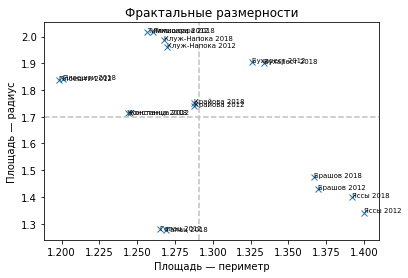

In [779]:
plt.plot(bc['fractal'], bc['slope1'], 'x')
for i in range(len(bc)):
    plt.text(bc.at[i, 'fractal'], bc.at[i, 'slope1'], s = (bc.at[i, 'imya'] + ' ' + bc.at[i, 'year']), size = 'x-small')
plt.xlabel('Площадь — периметр')
plt.ylabel('Площадь — радиус')
plt.title('Фрактальные размерности')
plt.axvline(statistics.mean(bc['fractal']), ls ='--', c = '#c0c0c0')
plt.axhline(statistics.mean(bc['slope1']), ls ='--', c = '#c0c0c0')
plt.show()

In [ ]:
#Качаем и пишем всякие файлы

In [675]:
b12.to_file("b12.gpkg", driver="GPKG")
b18.to_file("b18.gpkg", driver="GPKG")

C:\anaconda\envs\geo\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\anaconda\envs\geo\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [780]:
circ12.to_file("circ.gpkg", driver="GPKG")

C:\anaconda\envs\geo\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [537]:
b.drop('geometry', 1).to_csv("b.csv")

C:\Users\Артем Смирнов\AppData\Local\Temp\ipykernel_21100\1573472397.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  b.drop('geometry', 1).to_csv("b.csv")


In [653]:
bc.drop('geometry', 1).to_csv("bc.csv")

C:\Users\Артем Смирнов\AppData\Local\Temp\ipykernel_21100\1228596829.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bc.drop('geometry', 1).to_csv("bc.csv")


<AxesSubplot:>

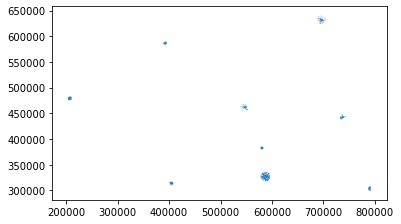

In [769]:
bc12 = gpd.read_file('bc12.gpkg')
bc12.plot()

<AxesSubplot:>

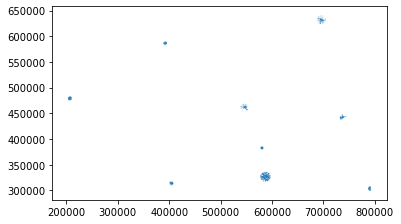

In [770]:
bc18 = gpd.read_file('bc18.gpkg')
bc18.plot()

In [778]:
bc['fractal'] = mp.FractalDimension(bc).series